# Random Forest Fraud Check

### Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C:\\Users\\User\\Documents\\Datascience_Assignments\\Assignment 15 (Random Forests)\\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


<AxesSubplot:>

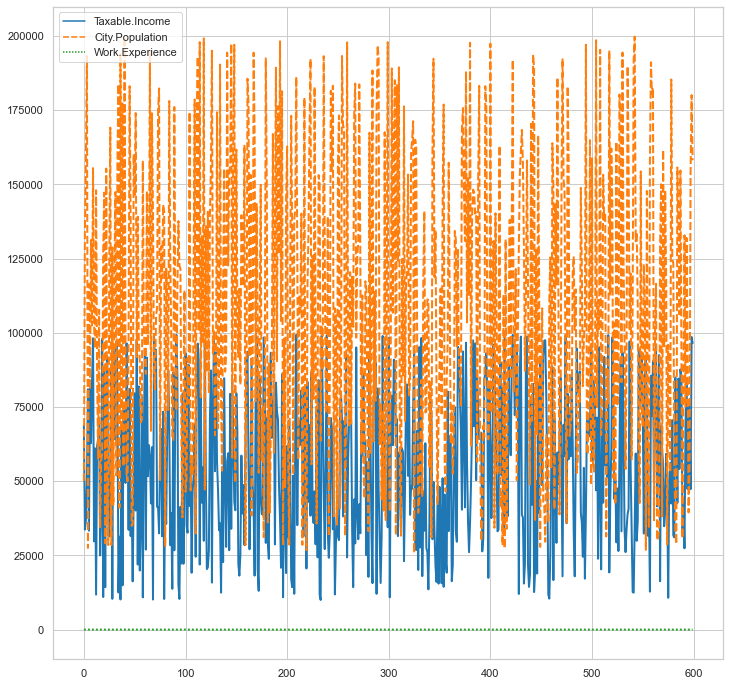

In [11]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2)

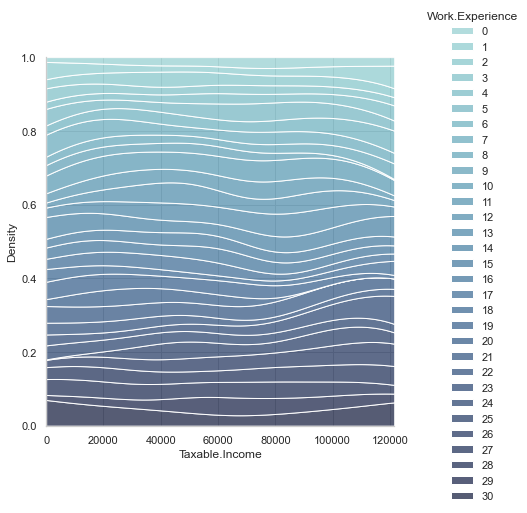

In [17]:
sns.set_theme(style='whitegrid')
sns.displot(
    data=data,
    x="Taxable.Income", hue="Work.Experience",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

In [3]:
data=pd.get_dummies(data=data,columns=['Undergrad','Marital.Status','Urban'])

In [4]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [5]:
y[y<=30000]=0
y[y>30000]=1

<ipython-input-5-382c55faf369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y<=30000]=0
<ipython-input-5-382c55faf369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>30000]=1


In [40]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

In [41]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [42]:
x_train

array([[ 1.8116835 , -0.59919532,  1.04257207, ..., -0.74053163,
         1.00417538, -1.00417538],
       [-0.66558799,  0.18297107, -0.9591663 , ..., -0.74053163,
        -0.99584198,  0.99584198],
       [-0.37676469,  0.07123301, -0.9591663 , ...,  1.35038121,
        -0.99584198,  0.99584198],
       ...,
       [ 0.97254691, -0.48745727, -0.9591663 , ...,  1.35038121,
         1.00417538, -1.00417538],
       [ 0.35648539, -0.59919532, -0.9591663 , ..., -0.74053163,
        -0.99584198,  0.99584198],
       [ 1.4359507 ,  1.18861357, -0.9591663 , ..., -0.74053163,
         1.00417538, -1.00417538]])

In [43]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [44]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [45]:
y_pred=classifier.predict(x_test)

In [46]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [47]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Taxable.Income,,
0,5,20
1,13,82


In [48]:
np.mean(y_pred==y_test)

0.725

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
seed=7

kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7283333333333333


In [56]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7299999999999999
